Objective: To Proof of Moore's law using linear Regression.

How: in below urls given dataset uses of transiters get double on every year hence will try to resolve with regression problem if data is Linear and moving ahead based on Moore's Law

In [34]:
#Import tensor flow

import tensorflow as tf

print(tf.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url = 'https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv'

In [4]:
data=pd.read_csv(url,header=None).values

In [5]:
data.shape

(162, 2)

In [6]:
X=data[:,0].reshape(-1,1) #(reshape(-1.1) used to making 2d array) # since tensorflow understand 2d array

In [7]:
X.shape 

(162, 1)

In [8]:
y=data[:,1].reshape(-1,1)

In [9]:
y.shape

(162, 1)

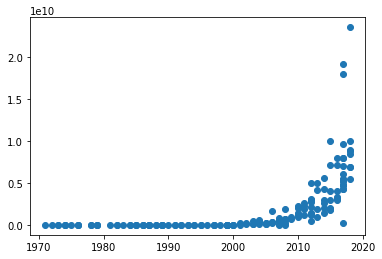

In [10]:
#plot the data

plt.scatter(X,y)

# since below plot is showing as exponantial hence linear line not possible thats why need to take log value of x and y

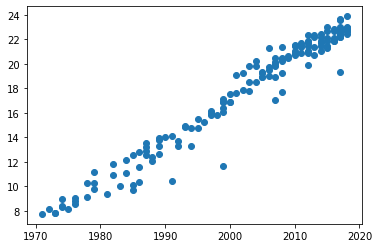

In [11]:
#changing data into log and checking if data is linear

Y=np.log(y)
plt.scatter(X,Y)

# now data is better 

In [12]:
#since our data is not centered to 0 will do that
X=X-X.mean()

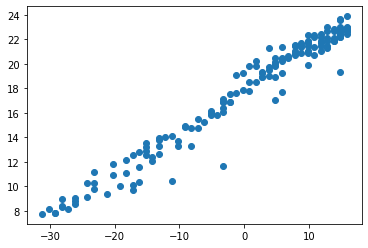

In [13]:
#again will plot the data

plt.scatter(X,Y)

#now look below on x axis data is perfect

In [14]:
#since this is regression problem , we dont required activation function hence no need to pass in keras
#howver by defalt activation function would be 'none' in keras 

In [15]:
model=tf.keras.Sequential([
                           tf.keras.layers.Input(shape=(1,)), #provide input layer
                           tf.keras.layers.Dense(1) #give output layer 
])

In [16]:
#Compile
# in compile we decide below-
# what is optimizer?
# what is loss function?
#'adam' is the best optimizer
# we also find 'SGD' optimizer works better
# API SGD look as below-
#SGD(learning rate, momentum)

In [17]:
#below model has been complied with SGD optimizer 
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),loss='mse') #learning rate=0.001, momentum =0.9( give any value 0 to 1), loss=MSE(mean sq err)

observation: initial learning rate perform very well but later on become too
large by end and therefore the cost become too high and the problem never convergaes

what to do?
to decrease learning rate depending upon the epochs. this is called as 'learning rate scheduling'. 

In [18]:
#learning rate scheduler
def schedule(epoch,lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule) # implementaion of scheduler

  

In [19]:
# train the model
r=model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 326.3454
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 286.5500
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 261.5879
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 207.0362
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 160.1059
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 140.0395
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 113.7796
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 111.7529
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 66.7818
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 39.4060
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 28.2407
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 31.8935
Epoch 13/200
6/6 [=======================

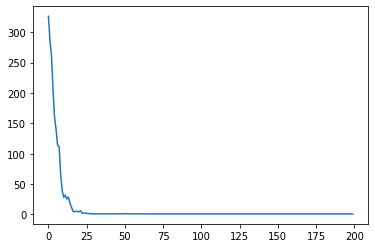

In [20]:
plt.plot(r.history['loss'],label='loss')

In [21]:
print(model.layers)

# there is only one layer input layer doesnt count 

In [32]:
#slop of the line
a=model.layers[0].get_weights()[0][0]

In [33]:

print('Time to double:', np.log(2)/a)


Time to double: [2.0889192]


In [35]:
# therefore, we have confirmed that Moore's law is true as we see it has doubled 

In [36]:
#Prediction

In [37]:
  #since tensorflow Dense layer has multiple outputs , its going to return a 2D matrix, whereas, we want a matrix 
  #of 1D length. therefore , we need to flatten the output so my Y has same shape as Y

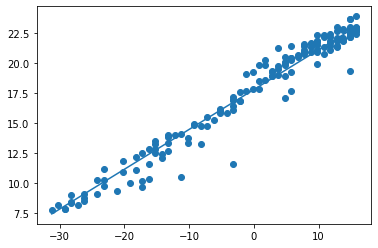

In [38]:
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

Observation: Line passes through the data points that once again confirms the Moore's law